In [89]:
#import Data
import pandas as pd
Data_1 = pd.read_csv('/content/drive/MyDrive/Kaggle Advanced House price/train.csv')
Data_1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [90]:
Data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [91]:
Data_2 = Data_1.drop(['MiscFeature','Fence','PoolQC','FireplaceQu','Alley','Id'],axis=1)  # Drop the columns which are too much of null values and less importance.
Data_2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [92]:
Data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [93]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.NaN, strategy ='most_frequent')
Data_2.MasVnrType = imputer.fit_transform(Data_2['MasVnrType'].values.reshape(-1,1))[:,0]
Data_2.BsmtQual  = imputer.fit_transform(Data_2['BsmtQual'].values.reshape(-1,1))[:,0]
Data_2.BsmtCond  = imputer.fit_transform(Data_2['BsmtCond'].values.reshape(-1,1))[:,0]
Data_2.BsmtExposure  = imputer.fit_transform(Data_2['BsmtExposure'].values.reshape(-1,1))[:,0]
Data_2.BsmtFinType1  = imputer.fit_transform(Data_2['BsmtFinType1'].values.reshape(-1,1))[:,0]
Data_2.BsmtFinType2  = imputer.fit_transform(Data_2['BsmtFinType2'].values.reshape(-1,1))[:,0]
Data_2.Electrical  = imputer.fit_transform(Data_2['Electrical'].values.reshape(-1,1))[:,0]
Data_2.GarageType  = imputer.fit_transform(Data_2['GarageType'].values.reshape(-1,1))[:,0]
Data_2.GarageFinish  = imputer.fit_transform(Data_2['GarageFinish'].values.reshape(-1,1))[:,0]
Data_2.GarageQual  = imputer.fit_transform(Data_2['GarageQual'].values.reshape(-1,1))[:,0]
Data_2.GarageCond  = imputer.fit_transform(Data_2['GarageCond'].values.reshape(-1,1))[:,0]


In [94]:
Data_2['GarageYrBlt'].value_counts()[Data_2['GarageYrBlt'].value_counts() == Data_2['GarageYrBlt'].value_counts().max()]

2005.0    65
Name: GarageYrBlt, dtype: int64

In [95]:
Data_2['MasVnrArea'].value_counts()[Data_2['MasVnrArea'].value_counts() == Data_2['MasVnrArea'].value_counts().max()]

0.0    861
Name: MasVnrArea, dtype: int64

In [96]:
Data_2['LotFrontage'].value_counts()[Data_2['LotFrontage'].value_counts() == Data_2['LotFrontage'].value_counts().max()]

60.0    143
Name: LotFrontage, dtype: int64

In [97]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value=2005.0)
Data_2.GarageYrBlt = imputer.fit_transform(Data_2['GarageYrBlt'].values.reshape(-1,1))[:,0]

In [98]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value=0.0)
Data_2.MasVnrArea = imputer.fit_transform(Data_2['MasVnrArea'].values.reshape(-1,1))[:,0]

In [99]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value=60.0)
Data_2.LotFrontage = imputer.fit_transform(Data_2['LotFrontage'].values.reshape(-1,1))[:,0]

In [100]:
Data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [101]:
import datetime
datetime.datetime.now().year

2021

In [102]:
Data_2['GarageYrBlt'] = Data_2['GarageYrBlt'].apply(np.int64)

In [103]:
Data_2['YearBuilt_N']=datetime.datetime.now().year-Data_2['YearBuilt']
Data_2['YrSold_N']=datetime.datetime.now().year-Data_2['YrSold']
Data_2['GarageYrBlt_N']=datetime.datetime.now().year-Data_2['GarageYrBlt']
Data_2['YearRemodAdd_N']=datetime.datetime.now().year-Data_2['YearRemodAdd']

In [104]:
Data_2.drop(['YearBuilt','YrSold','GarageYrBlt','YearRemodAdd'], axis='columns', inplace=True)

In [105]:
Data_2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_N,YrSold_N,GarageYrBlt_N,YearRemodAdd_N
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,WD,Normal,208500,18,13,18,18
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,WD,Normal,181500,45,14,45,45
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,WD,Normal,223500,20,13,20,19
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,WD,Abnorml,140000,106,15,23,51
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,WD,Normal,250000,21,13,21,21


In [106]:
for i in Data_2.columns:
    print("Column name {} and unique values are {}".format(i,len(Data_2[i].unique())))

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 1073
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name LandContour and unique values are 4
Column name Utilities and unique values are 2
Column name LotConfig and unique values are 5
Column name LandSlope and unique values are 3
Column name Neighborhood and unique values are 25
Column name Condition1 and unique values are 9
Column name Condition2 and unique values are 8
Column name BldgType and unique values are 5
Column name HouseStyle and unique values are 8
Column name OverallQual and unique values are 10
Column name OverallCond and unique values are 9
Column name RoofStyle and unique values are 6
Column name RoofMatl and unique values are 8
Column name Exterior1st and unique values are 15
Column name Exterior2nd and unique values are 16
Column name Ma

In [107]:
Categorical_features = []
Continuous_features = []
for i in Data_2.columns:
  if len(Data_2[i].unique()) <= 25:
    Categorical_features.append(i)
  else:
    Continuous_features.append(i)       

In [108]:
print(Categorical_features,Continuous_features)

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition', 'YrSold_N'] ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'YearB

In [109]:
# Remove 'SalePrice' as it is referred as output feature:
Continuous_features.remove('SalePrice')
print(Continuous_features)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'YearBuilt_N', 'GarageYrBlt_N', 'YearRemodAdd_N']


In [110]:
output_feature = ['SalePrice']

In [111]:
from sklearn.preprocessing import LabelEncoder
label_encoders={}
for feature in Categorical_features:
    label_encoders[feature]=LabelEncoder()
    Data_2[feature]=label_encoders[feature].fit_transform(Data_2[feature])

In [112]:
Data_2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_N,YrSold_N,GarageYrBlt_N,YearRemodAdd_N
0,5,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,6,4,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,6,6,0,1,1,2,548,4,4,2,0,61,0,0,0,0,0,1,8,4,208500,18,2,18,18
1,0,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,5,7,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,4,6,1,1,1,2,460,4,4,2,298,0,0,0,0,0,0,4,8,4,181500,45,3,45,45
2,5,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,6,4,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,4,6,1,1,1,2,608,4,4,2,0,42,0,0,0,0,0,8,8,4,223500,20,2,20,19
3,6,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,6,4,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,5,6,1,5,2,3,642,4,4,2,0,35,272,0,0,0,0,1,8,0,140000,106,4,23,51
4,5,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,7,4,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,7,6,1,1,1,3,836,4,4,2,192,84,0,0,0,0,0,11,8,4,250000,21,2,21,21


In [113]:
index_No=[]
for i in Categorical_features:
  index_no = Data_2.columns.get_loc(i)
  index_No.append(index_no)

In [114]:
# Converting categorical features into tensors
cat_features=(Data_2[Data_2.columns[index_No]])
cat_features = np.stack(cat_features.values)
cat_features

array([[5, 3, 1, ..., 8, 4, 2],
       [0, 3, 1, ..., 8, 4, 3],
       [5, 3, 1, ..., 8, 4, 2],
       ...,
       [6, 3, 1, ..., 8, 4, 0],
       [0, 3, 1, ..., 8, 4, 0],
       [0, 3, 1, ..., 8, 4, 2]])

In [115]:
#Convert numpy to Tensors
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1,  ..., 8, 4, 2],
        [0, 3, 1,  ..., 8, 4, 3],
        [5, 3, 1,  ..., 8, 4, 2],
        ...,
        [6, 3, 1,  ..., 8, 4, 0],
        [0, 3, 1,  ..., 8, 4, 0],
        [0, 3, 1,  ..., 8, 4, 2]])

In [116]:
#coverting continuous features into tensors
cont_features=np.stack([Data_2[i].values for i in Continuous_features],axis=1)
cont_features=torch.tensor(cont_features,dtype=torch.float)
cont_features

tensor([[   65.,  8450.,   196.,  ...,    18.,    18.,    18.],
        [   80.,  9600.,     0.,  ...,    45.,    45.,    45.],
        [   68., 11250.,   162.,  ...,    20.,    20.,    19.],
        ...,
        [   66.,  9042.,     0.,  ...,    80.,    80.,    15.],
        [   68.,  9717.,     0.,  ...,    71.,    71.,    25.],
        [   75.,  9937.,     0.,  ...,    56.,    56.,    56.]])

In [117]:
#convert output_features into tensors
out_features=np.stack([Data_2[i].values for i in output_feature],axis=1)
out_features=torch.tensor(out_features,dtype=torch.float)
out_features

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [118]:
out_features.shape,cont_features.shape,cat_features.shape

(torch.Size([1460, 1]), torch.Size([1460, 18]), torch.Size([1460, 56]))

In [119]:
#Embedding Size for Categorical features:
cat_dims=[len(Data_2[i].unique()) for i in Categorical_features]
cat_dims

[15,
 5,
 2,
 4,
 4,
 2,
 5,
 3,
 25,
 9,
 8,
 5,
 8,
 10,
 9,
 6,
 8,
 15,
 16,
 4,
 4,
 5,
 6,
 4,
 4,
 4,
 6,
 6,
 6,
 5,
 2,
 5,
 24,
 4,
 3,
 4,
 3,
 8,
 4,
 4,
 12,
 7,
 4,
 6,
 3,
 5,
 5,
 5,
 3,
 20,
 8,
 21,
 12,
 9,
 6,
 5]

In [120]:
embedding_dim= [(x, min(50, (x + 1) // 2)) for x in cat_dims]
embedding_dim

[(15, 8),
 (5, 3),
 (2, 1),
 (4, 2),
 (4, 2),
 (2, 1),
 (5, 3),
 (3, 2),
 (25, 13),
 (9, 5),
 (8, 4),
 (5, 3),
 (8, 4),
 (10, 5),
 (9, 5),
 (6, 3),
 (8, 4),
 (15, 8),
 (16, 8),
 (4, 2),
 (4, 2),
 (5, 3),
 (6, 3),
 (4, 2),
 (4, 2),
 (4, 2),
 (6, 3),
 (6, 3),
 (6, 3),
 (5, 3),
 (2, 1),
 (5, 3),
 (24, 12),
 (4, 2),
 (3, 2),
 (4, 2),
 (3, 2),
 (8, 4),
 (4, 2),
 (4, 2),
 (12, 6),
 (7, 4),
 (4, 2),
 (6, 3),
 (3, 2),
 (5, 3),
 (5, 3),
 (5, 3),
 (3, 2),
 (20, 10),
 (8, 4),
 (21, 11),
 (12, 6),
 (9, 5),
 (6, 3),
 (5, 3)]

In [121]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
  (4): Embedding(4, 2)
  (5): Embedding(2, 1)
  (6): Embedding(5, 3)
  (7): Embedding(3, 2)
  (8): Embedding(25, 13)
  (9): Embedding(9, 5)
  (10): Embedding(8, 4)
  (11): Embedding(5, 3)
  (12): Embedding(8, 4)
  (13): Embedding(10, 5)
  (14): Embedding(9, 5)
  (15): Embedding(6, 3)
  (16): Embedding(8, 4)
  (17): Embedding(15, 8)
  (18): Embedding(16, 8)
  (19): Embedding(4, 2)
  (20): Embedding(4, 2)
  (21): Embedding(5, 3)
  (22): Embedding(6, 3)
  (23): Embedding(4, 2)
  (24): Embedding(4, 2)
  (25): Embedding(4, 2)
  (26): Embedding(6, 3)
  (27): Embedding(6, 3)
  (28): Embedding(6, 3)
  (29): Embedding(5, 3)
  (30): Embedding(2, 1)
  (31): Embedding(5, 3)
  (32): Embedding(24, 12)
  (33): Embedding(4, 2)
  (34): Embedding(3, 2)
  (35): Embedding(4, 2)
  (36): Embedding(3, 2)
  (37): Embedding(8, 4)
  (38): Embedding(4, 2)
  (39): Embedding(4, 2)
  (40): Embedding(12, 6)
  (41

In [122]:
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))

In [123]:
embedding_val

[tensor([[ 0.3311,  0.2025,  0.5084,  ..., -0.2768,  1.2879,  0.5141],
         [ 0.7452, -0.2502,  0.0095,  ...,  1.0583,  0.6638,  1.1809],
         [ 0.3311,  0.2025,  0.5084,  ..., -0.2768,  1.2879,  0.5141],
         ...,
         [-0.3029, -2.1623,  0.1273,  ..., -0.9303, -0.7807, -1.4977],
         [ 0.7452, -0.2502,  0.0095,  ...,  1.0583,  0.6638,  1.1809],
         [ 0.7452, -0.2502,  0.0095,  ...,  1.0583,  0.6638,  1.1809]],
        grad_fn=<EmbeddingBackward>), tensor([[-0.6104, -1.6496,  0.9787],
         [-0.6104, -1.6496,  0.9787],
         [-0.6104, -1.6496,  0.9787],
         ...,
         [-0.6104, -1.6496,  0.9787],
         [-0.6104, -1.6496,  0.9787],
         [-0.6104, -1.6496,  0.9787]], grad_fn=<EmbeddingBackward>), tensor([[0.3028],
         [0.3028],
         [0.3028],
         ...,
         [0.3028],
         [0.3028],
         [0.3028]], grad_fn=<EmbeddingBackward>), tensor([[ 0.9123,  1.8476],
         [ 0.9123,  1.8476],
         [-0.6224,  0.5283],
     

In [124]:
Concatenate_embed = torch.cat(embedding_val, 1)
#Concatenate_embed.shape  :  torch.Size([1460, 214])
Concatenate_embed

tensor([[ 0.3311,  0.2025,  0.5084,  ...,  1.3141,  1.0330,  0.5311],
        [ 0.7452, -0.2502,  0.0095,  ...,  0.8421, -0.6437, -0.9148],
        [ 0.3311,  0.2025,  0.5084,  ...,  1.3141,  1.0330,  0.5311],
        ...,
        [-0.3029, -2.1623,  0.1273,  ..., -0.9480,  0.2621,  0.8946],
        [ 0.7452, -0.2502,  0.0095,  ..., -0.9480,  0.2621,  0.8946],
        [ 0.7452, -0.2502,  0.0095,  ...,  1.3141,  1.0330,  0.5311]],
       grad_fn=<CatBackward>)

In [125]:
# Implement dropupout
droput=nn.Dropout(.4)

In [126]:
final_embed=droput(Concatenate_embed)
# final_embed.shape : torch.Size([1460, 214]
final_embed

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  2.1901,  1.7216,  0.8851],
        [ 1.2420, -0.0000,  0.0158,  ...,  1.4034, -1.0728, -0.0000],
        [ 0.5518,  0.3376,  0.8474,  ...,  2.1901,  1.7216,  0.8851],
        ...,
        [-0.5048, -3.6038,  0.2121,  ..., -0.0000,  0.4369,  0.0000],
        [ 1.2420, -0.0000,  0.0158,  ..., -1.5800,  0.0000,  1.4910],
        [ 1.2420, -0.0000,  0.0000,  ...,  2.1901,  1.7216,  0.8851]],
       grad_fn=<MulBackward0>)

In [185]:
class FeedForwardNN(nn.Module):
  def __init__(self, embedding_dim, n_cont, out_sz, layers, p):                             # define variables
    super().__init__()
    self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])       #take input and output values from embedding_dim for feed to the embedding layer
    self.emb_drop = nn.Dropout(p)                                                           #Add dropout layer
    self.bn_cont = nn.BatchNorm1d(n_cont)                                                   #Add Batch Normalization

    layerlist=[] 
    n_emb = sum((out for inp,out in embedding_dim))                                         #take only output value from embedding_dim
    n_in = n_emb + n_cont                                                                   #defining n_in

    for i in layers:
      layerlist.append(nn.Linear(n_in,i))                                                  # based on the count of i, no of layers will be decided.for first layer , the input feature is n_in.
      layerlist.append(nn.ReLU(inplace=True))                                              # For each layer , define activation function.(Sigmoid is not recommended as usecase is regression)
      layerlist.append(nn.BatchNorm1d(i))
      layerlist.append(nn.Dropout(p))
      n_in=i                                                                               # for next layer, the input feature is i
    layerlist.append(nn.Linear(layers[-1],out_sz))                                         #adding output size

    self.layers = nn.Sequential(*layerlist)                                                # Finally wrap it in sequential 

  def forward(self, x_cat , x_cont):
    embeddings = []
    for i,e in enumerate(self.embeds):
      embeddings.append(e(x_cat[:,i]))                                                     # concatenate embedding values
    x=torch.cat(embeddings,1)                                                            # convert embedding values into tensors
    x=self.emb_drop(x)                                                                   # dropout the values avoid overfitting

    x_cont=self.bn_cont(x_cont)                                                          #Batch normalization of continuous values
    x=torch.cat([x,x_cont],1)                                                            # convert into tensors
    x=self.layers(x)
    return x
       



In [176]:
len(Continuous_features)

18

In [182]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(Continuous_features),1,[1000,500],p=0.4)                        #Assign the attributes to the model
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
    (4): Embedding(4, 2)
    (5): Embedding(2, 1)
    (6): Embedding(5, 3)
    (7): Embedding(3, 2)
    (8): Embedding(25, 13)
    (9): Embedding(9, 5)
    (10): Embedding(8, 4)
    (11): Embedding(5, 3)
    (12): Embedding(8, 4)
    (13): Embedding(10, 5)
    (14): Embedding(9, 5)
    (15): Embedding(6, 3)
    (16): Embedding(8, 4)
    (17): Embedding(15, 8)
    (18): Embedding(16, 8)
    (19): Embedding(4, 2)
    (20): Embedding(4, 2)
    (21): Embedding(5, 3)
    (22): Embedding(6, 3)
    (23): Embedding(4, 2)
    (24): Embedding(4, 2)
    (25): Embedding(4, 2)
    (26): Embedding(6, 3)
    (27): Embedding(6, 3)
    (28): Embedding(6, 3)
    (29): Embedding(5, 3)
    (30): Embedding(2, 1)
    (31): Embedding(5, 3)
    (32): Embedding(24, 12)
    (33): Embedding(4, 2)
    (34): Embedding(3, 2)
    (35): Embedding(4, 2)
    (36): Embedding(3, 2)
 

In [183]:
#Define loss and optimizer
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [184]:
#Splitting the data:
batch_size = 1460
test_size = int(batch_size*0.15)
train_Categorical=cat_features[:batch_size-test_size]
test_Categorical=cat_features[batch_size-test_size:batch_size]
train_Continuous=cont_features[:batch_size-test_size]
test_Continuous=cont_features[batch_size-test_size:batch_size]
train_output=out_features[:batch_size-test_size]
test_output=out_features[batch_size-test_size:batch_size]

In [180]:
len(train_Categorical),len(test_Categorical),len(train_Continuous),len(test_Continuous),len(train_output),len(test_output)

(1241, 219, 1241, 219, 1241, 219)

In [186]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    out_pred=model(train_Categorical,train_Continuous)
    loss=torch.sqrt(loss_function(out_pred,train_output)) ### RMSE
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 197941.078125
Epoch number: 11 and the loss : 197917.921875
Epoch number: 21 and the loss : 197876.03125
Epoch number: 31 and the loss : 197812.90625
Epoch number: 41 and the loss : 197725.09375
Epoch number: 51 and the loss : 197609.171875
Epoch number: 61 and the loss : 197466.765625
Epoch number: 71 and the loss : 197287.734375
Epoch number: 81 and the loss : 197078.828125
Epoch number: 91 and the loss : 196834.109375
Epoch number: 101 and the loss : 196552.796875
Epoch number: 111 and the loss : 196243.046875
Epoch number: 121 and the loss : 195891.46875
Epoch number: 131 and the loss : 195511.109375
Epoch number: 141 and the loss : 195097.421875
Epoch number: 151 and the loss : 194636.359375
Epoch number: 161 and the loss : 194143.234375
Epoch number: 171 and the loss : 193605.75
Epoch number: 181 and the loss : 193041.390625
Epoch number: 191 and the loss : 192441.53125
Epoch number: 201 and the loss : 191799.75
Epoch number: 211 and the loss : 1911

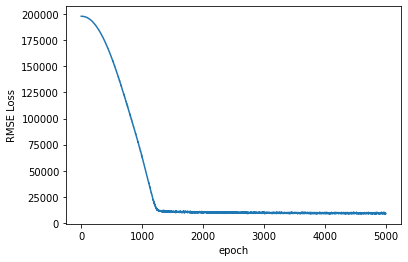

In [187]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [188]:
#### Validate the Test Data
out_pred=""
with torch.no_grad():
    out_pred=model(test_Categorical,test_Continuous)
    loss=torch.sqrt(loss_function(out_pred,test_output))
print('RMSE: {}'.format(loss))

RMSE: 41414.2421875


In [190]:
torch.save(model.state_dict(),'HouseWeights.pt')